In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
url = 'https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fs3-ap-northeast-1.amazonaws.com%2Fpsh-ex-ftnikkei-3937bb4%2Fimages%2F1%2F1%2F2%2F8%2F14018211-7-eng-GB%2F0529N-Solar.jpg?source=nar-cms'
Image(url= url, width=600, height=600, unconfined=True)


    

Image Source:-www.asia.nikkei.com

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/.DS_Store
../input/heart.csv
../input/iris/Iris.csv
../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
../input/classification-suv-dataset/Social_Network_Ads.csv
../input/wine-reviews/.DS_Store
../input/wine-reviews/winemag-data-130k-v2.csv
../input/wine-reviews/winemag-data-130k-v2.json
../input/wine-reviews/winemag-data_first150k.csv
../input/random-linear-regression/test.csv
../input/random-linear-regression/train.csv
../input/solar-power-generation-data/Plant_2_Generation_Data.csv
../input/solar-power-generation-data/Plant_1_Generation_Data.csv
../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
../input/svm-classification/SVM_Classification.R
../input/svm-classification/UniversalBank.csv
../input/svm-classification/Activity Sheet.docx
../input/house-prices-advanced-regression-techniques/test.csv
../input/house-prices-advanced-regression-techniques/data_description.txt
.

# Import files

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
#import n2w
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

In [4]:
# load data related to plant# 1

df_gen=pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
df_weather=pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')

# Install n2w library

In [5]:
#pip install n2w

In [6]:
import n2w

In [7]:
df_gen.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [8]:
df_weather.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

## Data Cleaning

In [9]:
# drop unwanted columns. 
df_weather = df_weather.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_gen = df_gen.drop(['PLANT_ID'], axis=1)

# convert the date_time column into timedate stamp
df_gen["DATE_TIME"] = df_gen["DATE_TIME"].apply(pd.to_datetime)
df_weather["DATE_TIME"] = df_weather["DATE_TIME"].apply(pd.to_datetime)

In [10]:
# Convert the sourcekey to meaningful representation. 
num = list(np.arange(0,22))

#extract source key from df_gen file. 
source_key = list(df_gen['SOURCE_KEY'].unique())

source_num = []
for n in num:
    source_num.append(n2w.convert(n))

#Replace source_key list in dataframe by number in words. 
for n in range(len(source_key)):
    df_gen = df_gen.replace(source_key[n],source_num[n])  


In [11]:
df_gen.head()

DATE_TIME SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
0 2020-05-15       zero       0.0       0.0          0.0    6259559.0
1 2020-05-15        one       0.0       0.0          0.0    6183645.0
2 2020-05-15        two       0.0       0.0          0.0    6987759.0
3 2020-05-15      three       0.0       0.0          0.0    7602960.0
4 2020-05-15       four       0.0       0.0          0.0    7158964.0

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/PV-system-schematics-residential-Eng.png/360px-PV-system-schematics-residential-Eng.png'
Image(url= url, width=600, height=600, unconfined=True)

image source wikimedia.org

In [13]:
## Group data based on inverter. 

df_inv_id = {k: v for k, v in df_gen.groupby('SOURCE_KEY')}

## Assumptions

1. Sun raise and sunset falls between 05.30 and 19.30, for all the places in India. The power generation happens during 
these hours. (#https://www.timeanddate.com/astronomy/india)
2. Each record should have 14hours * 60min/15min = 56 +1 = 57 rows for weather and gen df's. (time slot:- 05.30 and 19.30)
3. All the inverters are located almost at same location. The weather readings based of one sensor represents all other sets of inverters
4. Solar cell performance hinders based on clouds blocking sun rays. The weather data provided has only ambient temp readings/ module readings does not provide details of preciptation amount, Direct radition, diffuse radition, Total Cloud cover, low, mid and high cloud cover. (https://www.meteoblue.com/en/weather/archive/export/india_el-salvador_3585481)
5. Total Power Output = Total Area x Solar Irradiance x Conversion Efficiency. The total area of the solar cells is unknown, conversion efficiency is unknown. The power unit of DC Power is kW, solar irradiance unit is not provided. Assuming following info. 
Conversion Efficiency = 20% 
Solar Irradiance is the power per unit area (watt per square metre, W/m2)

## Investigation
1. Hypothesis all Modules of same size. h0 = Mean production rate of each inverter for a given day are all equal. Only based off assumption 'Solar cell area is same for all the modules for all inverters'
2. Calculate solar cell area based on the assumptions and check for consistence across inverters/ days

# Extract performance of plant 1, inverter_1 on 2020-05-15

In [14]:
# lets pick a day and inverter number for investigation. Say Inverter = 'one', date = '2020:05:16' lets extract data df_gen
#and weather file. 

#extract dataframe for Inverter 'One'
df_1 = df_inv_id.get('one')
df_1.set_index('DATE_TIME', drop=True, append=False, inplace=True, verify_integrity=False)

df_1_day= df_1.loc['2020-05-15 05:30:00': '2020-05-15 19:30:00']

In [15]:
df_1_day.head()

SOURCE_KEY    DC_POWER   AC_POWER  DAILY_YIELD  \
DATE_TIME                                                            
2020-05-15 05:30:00        one    0.000000   0.000000          0.0   
2020-05-15 05:45:00        one    0.000000   0.000000          0.0   
2020-05-15 06:00:00        one   53.500000   5.162500          0.0   
2020-05-15 06:15:00        one  310.571429  30.014286          3.0   
2020-05-15 06:30:00        one  713.500000  69.200000         15.5   

                     TOTAL_YIELD  
DATE_TIME                         
2020-05-15 05:30:00    6183645.0  
2020-05-15 05:45:00    6183645.0  
2020-05-15 06:00:00    6183645.0  
2020-05-15 06:15:00    6183648.0  
2020-05-15 06:30:00    6183660.5

In [16]:
## Similarly lets extract info from weather for date and range ['2020-05-15 05:30:00': '2020-05-15 19:30:00']
df_weather.set_index('DATE_TIME', drop=True, append=False, inplace=True, verify_integrity=False)
df_weath_1 = df_weather.loc['2020-05-15 05:30:00': '2020-05-15 19:30:00']

In [17]:
df_weath_1.head()

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
DATE_TIME                                                                
2020-05-15 05:30:00            24.328727           23.452380     0.000000
2020-05-15 05:45:00            24.289211           23.096692     0.000863
2020-05-15 06:00:00            24.088446           22.206757     0.005887
2020-05-15 06:15:00            24.011635           22.353459     0.022282
2020-05-15 06:30:00            23.976731           22.893282     0.049410

In [18]:
result = pd.concat([df_1_day,df_weath_1 ], axis=1, sort= False)

#timestamp 19:00, 19:15, 19:30 are missing! The DC power is zero and hence all the rows are delated. 
result.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
result.tail()

SOURCE_KEY    DC_POWER   AC_POWER  DAILY_YIELD  \
DATE_TIME                                                            
2020-05-15 17:45:00        one  528.375000  51.112500  6340.250000   
2020-05-15 18:00:00        one  305.571429  29.514286  6350.714286   
2020-05-15 18:15:00        one  105.500000  10.187500  6355.875000   
2020-05-15 18:30:00        one    0.000000   0.000000  6357.000000   
2020-05-15 18:45:00        one    0.000000   0.000000  6357.000000   

                     TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
DATE_TIME                                                                   
2020-05-15 17:45:00  6189985.250            32.311871           31.548539   
2020-05-15 18:00:00  6189995.714            31.132414           30.225331   
2020-05-15 18:15:00  6190000.875            29.243111           28.682507   
2020-05-15 18:30:00  6190002.000            28.495518           27.285992   
2020-05-15 18:45:00  6190002.000            27.884064           25.961947   

                     IRRADIATION  
DATE_TIME                         
2020-05-15 17:45:00     0.038403  
2020-05-15 18:00:00     0.022545  
2020-05-15 18:15:00     0.009150  
2020-05-15 18:30:00     0.001841  
2020-05-15 18:45:00     0.000000

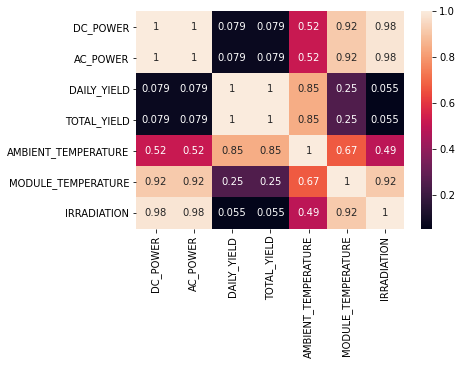

In [19]:
sns.heatmap(result.corr(),annot=True)

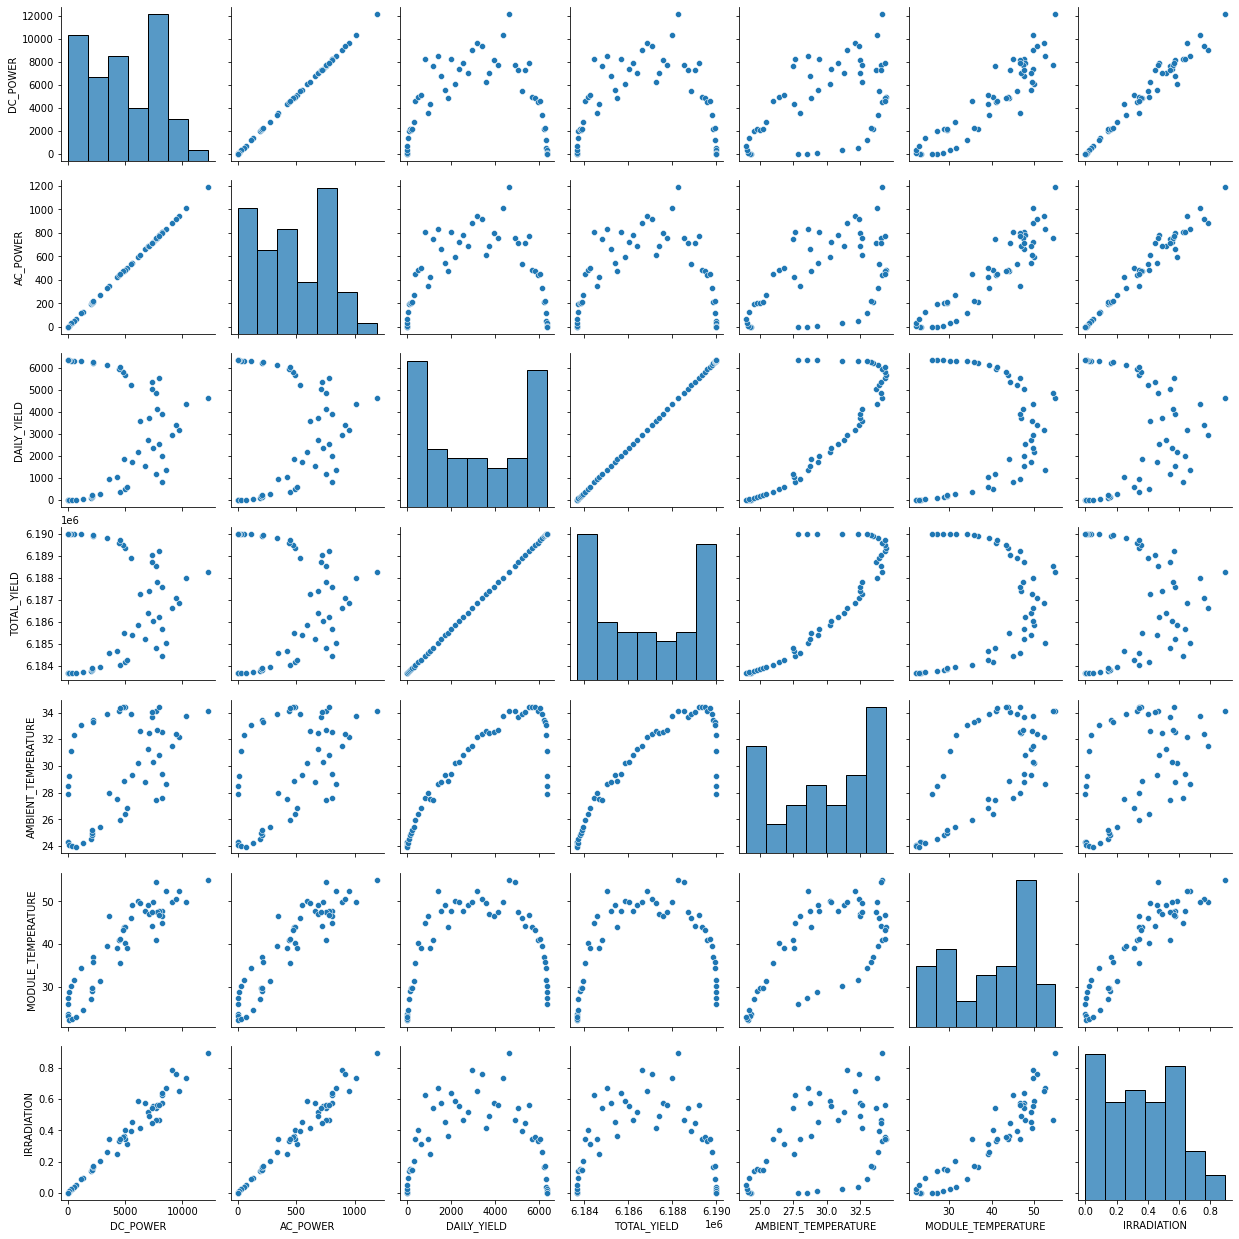

In [20]:
sns.pairplot(data=result) 

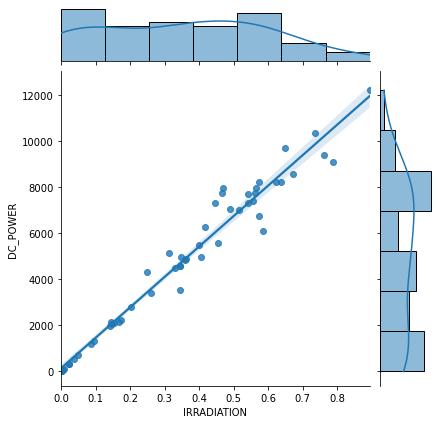

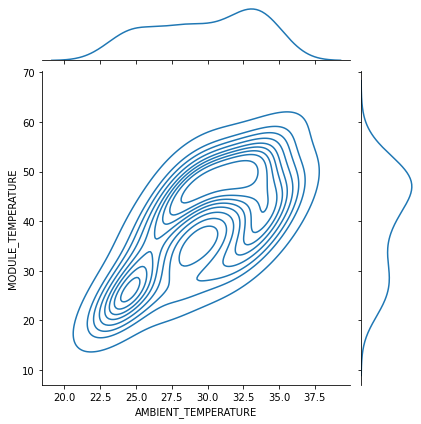

In [21]:
sns.jointplot(x='IRRADIATION', y='DC_POWER', data= result, kind = 'reg')
sns.jointplot(x='AMBIENT_TEMPERATURE', y='MODULE_TEMPERATURE', data= result,  kind = 'kde')

# Further cleaning
several columns from result are not important. Example daily_yield, total_yield, Module_temp, AC_power are irrelavent. 
The data shows colinearity and hence they are not included. for future analysis. 

In [22]:
result = result.drop(['AC_POWER', 'SOURCE_KEY', 'DAILY_YIELD','TOTAL_YIELD', 'MODULE_TEMPERATURE'], axis=1)


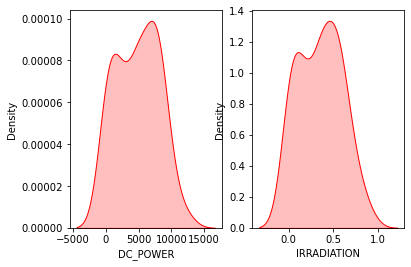

In [23]:
fig = plt.figure();   
ax1 = fig.add_subplot(121);  
ax2 = fig.add_subplot(122);

y =result['DC_POWER']
y1= result['IRRADIATION']

sns.kdeplot(y, shade=True, color="r",gridsize = 100, ax= ax1)
sns.kdeplot(y1, shade=True, color="r",gridsize = 100, ax=ax2)

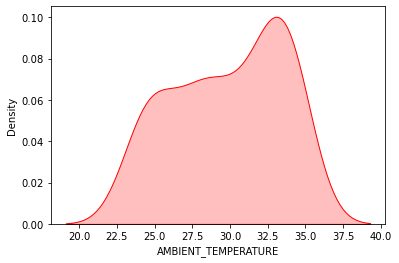

In [24]:
y2 = result['AMBIENT_TEMPERATURE']
sns.kdeplot(y2, shade=True, color="r",gridsize = 100)

## Area under the DC_POWER curve & surface area of solar cell. 

In [25]:
def area_undercurve(df):
    dc_array =df['DC_POWER']
    irrad_array = df['IRRADIATION']
    dc_power = round(sum(dc_array.values*15.0/60.0),4)
    solar_power = round(sum(irrad_array*15.0/60.0),4)
    
    solar_cell_area = round(dc_power/(solar_power*0.2), 4)
    
    return dc_power, solar_power, solar_cell_area


## Extract Information for "Inverter -1"

In [26]:
# Pseudo code
# 1. filter data for inverter 1 and combine this with weather data. To form one single dataframe
# 2. filter day time dcpower, solar_power and solar_cell_area for specific days with good data. 
# 3. study the variations between days. 
# 4. Hypothesis testing H0: Mean_of_inverter1 = Mean_of_inverter2 Ha means are not equal. 

In [27]:
## modify the dataframe filter to drop the columns that are not needed. 

df_one_comb = pd.concat([df_1,df_weather], axis=1).reindex(df_1.index)
df_one_comb = df_one_comb.drop(['AC_POWER', 'SOURCE_KEY', 'DAILY_YIELD','TOTAL_YIELD', 'MODULE_TEMPERATURE'], axis=1)

In [28]:
list_delta = [0,1,2,4,6,8,9,10,11,12,14,15,21,28,29,30,31,32]

start_date = dt.datetime(2020,5,16,5,30,0)
end_date = dt.datetime(2020,5,16,19,30,0)


dates = []
dc_pwr = []
solar_pwr = []
solar_cell_ar= []
inverter = ['one'] * len(list_delta)

for n in list_delta:
    start = start_date + dt.timedelta(days = n)
    end = end_date + dt.timedelta(days = n)
    dates.append(start.date())
    dc_power, solar_power, solar_cell_area = area_undercurve(df_one_comb.loc[start:end])
    dc_pwr.append(dc_power)
    solar_pwr.append(solar_power)
    solar_cell_ar.append(solar_cell_area)
    #print(start,end)
    
data = {'Date': dates, 'DC_power':dc_pwr, 'Solar_power': solar_pwr, 'Solar_cell_area': solar_cell_ar, 'inverter': inverter}
invert_results_df = pd.DataFrame(data= data, columns= ['Date', 'DC_power', 'Solar_power','Solar_cell_area', 'inverter'])

In [29]:
invert_results_df

Date    DC_power  Solar_power  Solar_cell_area inverter
0   2020-05-16  67419.5580       4.6629       72293.5920      one
1   2020-05-17  79175.4018       5.7328       69054.7392      one
2   2020-05-18  55496.1875       3.8166       72703.6990      one
3   2020-05-20  62880.2670       4.5614       68926.4995      one
4   2020-05-22  74249.5223       5.5298       67135.8117      one
5   2020-05-24  84859.2054       6.2343       68058.3268      one
6   2020-05-25  92791.6875       6.8079       68150.0077      one
7   2020-05-26  83238.2991       6.0626       68649.0112      one
8   2020-05-27  69983.5446       5.1344       68151.6288      one
9   2020-05-28  87229.2259       6.5081       67015.8924      one
10  2020-05-30  75187.3214       5.4688       68742.0654      one
11  2020-05-31  60031.2902       4.4064       68118.2941      one
12  2020-06-06  66868.4643       4.8817       68488.9120      one
13  2020-06-13  89677.2991       6.3473       70642.0833      one
14  2020-06-14  76658.6161       5.2821       72564.5256      one
15  2020-06-15  71083.7054       4.9422       71915.0433      one
16  2020-06-16  64593.9732       4.4948       71854.1128      one
17  2020-06-17  61934.5545       4.2337       73144.7133      one

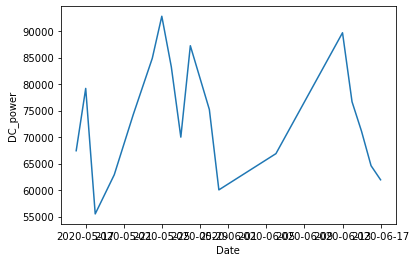

In [30]:
sns.lineplot(x="Date", y="DC_power", data=invert_results_df)

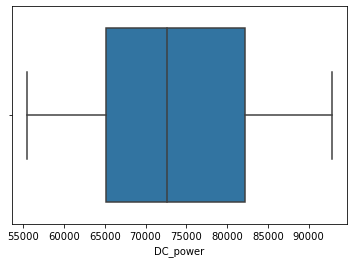

In [31]:
sns.boxplot(x=invert_results_df["DC_power"])

## Extract Information for "Inverter -2"

In [32]:
#extract dataframe for Inverter 'One'
df_2 = df_inv_id.get('two')
df_2.set_index('DATE_TIME', drop=True, append=False, inplace=True, verify_integrity=False)

## modify the dataframe filter to drop the columns that are not needed. 
df_two_comb = pd.concat([df_2,df_weather], axis=1).reindex(df_2.index)
df_two_comb = df_two_comb.drop(['AC_POWER', 'SOURCE_KEY', 'DAILY_YIELD','TOTAL_YIELD', 'MODULE_TEMPERATURE'], axis=1)

# dataframe for inverter2
df_two_comb.head()

DC_POWER  AMBIENT_TEMPERATURE  IRRADIATION
DATE_TIME                                                      
2020-05-15 00:00:00       0.0            25.184316          0.0
2020-05-15 00:15:00       0.0            25.084589          0.0
2020-05-15 00:30:00       0.0            24.935753          0.0
2020-05-15 00:45:00       0.0            24.846130          0.0
2020-05-15 01:00:00       0.0            24.621525          0.0

In [33]:
list_delta = [0,1,2,4,6,8,10,11,12,14,15,21,28,29,30,31,32]

start_date = dt.datetime(2020,5,16,5,30,0)
end_date = dt.datetime(2020,5,16,19,30,0)


dates = []
dc_pwr = []
solar_pwr = []
solar_cell_ar= []
inverter = ['two'] * len(list_delta)

for n in list_delta:
    start = start_date + dt.timedelta(days = n)
    end = end_date + dt.timedelta(days = n)
    dates.append(start.date())
    dc_power, solar_power, solar_cell_area = area_undercurve(df_two_comb.loc[start:end])
    dc_pwr.append(dc_power)
    solar_pwr.append(solar_power)
    solar_cell_ar.append(solar_cell_area)
    #print(start,end)
    
data_two = {'Date': dates, 'DC_power':dc_pwr, 'Solar_power': solar_pwr, 'Solar_cell_area': solar_cell_ar, 'inverter': inverter}
invert_two_results_df = pd.DataFrame(data= data_two, columns= ['Date', 'DC_power', 'Solar_power','Solar_cell_area', 'inverter'])

invert_two_results_df

Date    DC_power  Solar_power  Solar_cell_area inverter
0   2020-05-16  68119.7500       4.6629       73044.4037      two
1   2020-05-17  80363.2723       5.7328       70090.7692      two
2   2020-05-18  55527.7679       3.8166       72745.0714      two
3   2020-05-20  62720.1750       4.5614       68751.0139      two
4   2020-05-22  74613.8973       5.5298       67465.2766      two
5   2020-05-24  84598.0045       6.2343       67848.8399      two
6   2020-05-26  82637.6339       6.0626       68153.6254      two
7   2020-05-27  69077.6509       5.1344       67269.4481      two
8   2020-05-28  86842.4807       6.5081       66718.7664      two
9   2020-05-30  74753.5045       5.4688       68345.4364      two
10  2020-05-31  60291.9196       4.4064       68414.0337      two
11  2020-06-06  66440.8170       4.8817       68050.9013      two
12  2020-06-13  87760.5580       6.3473       69132.1964      two
13  2020-06-14  76571.1295       5.2821       72481.7113      two
14  2020-06-15  68472.9107       4.9422       69273.7148      two
15  2020-06-16  64659.3437       4.4948       71926.8307      two
16  2020-06-17  61894.5473       4.2337       73097.4647      two

## Hypothesis Testing 2sample t test

In [34]:
from scipy import stats
x1 = invert_results_df['DC_power']
x2 = invert_two_results_df['DC_power']

stats.ttest_ind(x1,x2)

Ttest_indResult(statistic=0.4086917781020744, pvalue=0.6854060170493916)

In [35]:
#Since P value is more than 0.5, statisitically fail to reject Null Hypothesis

## Further Analysis

 "Feel free to copy this notebook and continue analysis. If you wish to!"

1. Compare all other inverters of plant 1 for sample number of days
2. Compare all other inverters of plant 2 for sample number of days
3. Check if weather patterns for plant 1 and plant 2 vary significantly. If yes then the location of plant 2 is different 
from plant 1. 
4. Compare all inverters of plant 1 & 2 for a given day. 